# COx vs MAP

In [16]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from utils import zoll
from utils import nirs
from utils import misc
from utils.autoscale import autoscale

In [17]:
# parameters
case_id = 2
step_id = 7

In [18]:
case_str = str(case_id).zfill(5)
input_file = 'output/' + case_str + '_6.csv'

In [19]:
# load data
df = pd.read_csv(input_file,
                 sep = ',',
                 na_values = ['-'],
                 parse_dates = ['Time'],
                 index_col = 'Time')

In [20]:
# dropout
df['rSO2'] = np.where(df['Bad_rSO2_manual'] == 1, np.nan, df['rSO2'])
df['MAP'] = np.where(df['Bad_MAP_auto'] == 1, np.nan, df['MAP'])
df['MAP'] = np.where(df['Bad_MAP_manual'] == 1, np.nan, df['MAP'])

In [21]:
# smooth rSO2 to match MAP
df['rSO2'] = df['rSO2'].rolling(10).mean()

In [22]:
# resampling as per Ono, Joshi, Brady, Easley et al. 2012
#resampled_df = pd.DataFrame()
#resampled_df['MAP'] = df['MAP'].resample('10s').mean()
#resampled_df['rSO2'] = df['rSO2'].resample('10s').mean()

In [23]:
def custom_round(x, base=10):
    if (np.isnan(x)): return np.nan
    return base * round(float(x)/base)

In [24]:
df['MAP_rounded'] = df['MAP'].apply(lambda x: custom_round(x))
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.dropna(subset=['COx'], inplace=True)

In [25]:
# Fisher transform
#df['COx'] = df['COx'].transform(np.arctanh)

In [26]:
binned_df = df.groupby(['MAP_rounded']).mean()

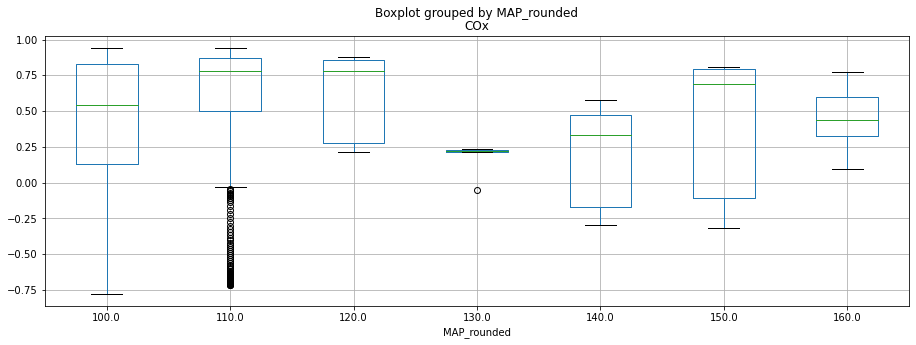

In [27]:
df.boxplot(column = 'COx', by = 'MAP_rounded', figsize = (15, 5));
plt.savefig(f'reports/images/{step_id}_{case_str}_01.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

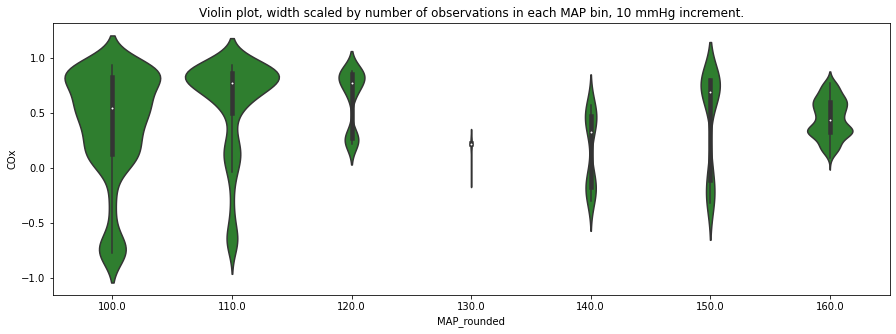

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
df['MAP_rounded'] = df['MAP'].apply(lambda x: custom_round(x, 10))
sns.violinplot(x='MAP_rounded', y='COx', data=df, scale="count", color="forestgreen", ax=ax).set_title("Violin plot, width scaled by number of observations in each MAP bin, 10 mmHg increment.")
plt.savefig(f'reports/images/{step_id}_{case_str}_02.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [29]:
df.MAP_rounded.value_counts()

100.0    699
110.0    686
160.0    331
130.0    297
120.0    293
150.0    140
140.0    101
Name: MAP_rounded, dtype: int64

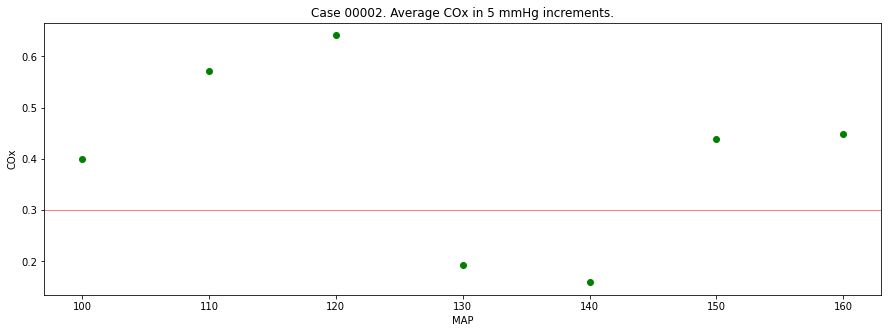

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(binned_df.index, binned_df['COx'], c='g')
ax.set_title(f'Case {case_str}. Average COx in 10 mmHg increments.')
ax.set_xlabel('MAP')
ax.set_ylabel('COx')
ax.axhline(0.3, linewidth=0.5, color="red")
plt.savefig(f'reports/images/{step_id}_{case_str}_03.png', bbox_inches='tight', pad_inches=0.1)
plt.show()